## Final Project Submission

Please fill out: 
* Student name: Pamela M Godia
* Student pace: Part time
* Scheduled project review date/time: 
* Instructor name: Mildred Jepkoskei
* Blog post URL:https://public.tableau.com/app/profile/pamela.godia/viz/Phase1ProjectPG_Dashboard/Dashboard1


# 1. Business Understanding

My company want to purchase a new aircraft to expand its business portfolio using aviation data from the National Transportation Safety Board, which consists of aviation accidents and selected incidents from 1963 to 2023 (Over 60 years), in the United States and international waters

## The Project Goal
To determine aircrafts with the lowet risk of accidents and fatalities, by analysing historical data, to help the company make an informed decision on aircraft purchase in order to start a business endaviour

## Key questions
What type of aircarfts have reported the least or no total fatal injuries over the last 60 years?
what type of aircrafts have reported the most total fatal injuries over the last 60 years?
what tupe of aircrafts have reported the least incidents 


# 2. Data Understanding
## Source of Data 
This is data from the National Transport and Safety Board that includes aviation accident data and selected incidents for over 60 years (1962-2023). 

In [1]:
# Import pandas and otherr libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


## Loading the data as a CSV file into Pandas

In [2]:
#loading the data
#read_csv('AviationData.csv', index_col=0) # pass argument index << use first column as index
df_aviation_data = pd.read_csv('Data/Aviation_Data.csv', index_col=0)

# check the first five rows and the content of the columns
df_aviation_data.head()

<ipython-input-2-fec52d67eb8b>:3: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df_aviation_data = pd.read_csv('Data/Aviation_Data.csv', index_col=0)


,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
Event.Id,,,,,,,,,,,,,,,,,,,,,
20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [3]:
#type of data
df_aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90348 entries, 20001218X45444 to 20221230106513
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      90348 non-null  object 
 1   Accident.Number         88889 non-null  object 
 2   Event.Date              88889 non-null  object 
 3   Location                88837 non-null  object 
 4   Country                 88663 non-null  object 
 5   Latitude                34382 non-null  object 
 6   Longitude               34373 non-null  object 
 7   Airport.Code            50249 non-null  object 
 8   Airport.Name            52790 non-null  object 
 9   Injury.Severity         87889 non-null  object 
 10  Aircraft.damage         85695 non-null  object 
 11  Aircraft.Category       32287 non-null  object 
 12  Registration.Number     87572 non-null  object 
 13  Make                    88826 non-null  object 
 14  Model                

In [4]:
#df Columns, print column lables
df_aviation_data.columns

Index(['Investigation.Type', 'Accident.Number', 'Event.Date', 'Location',
       'Country', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name',
       'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'FAR.Description', 'Schedule',
       'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

# 3. Data Preparation

## Renaming the Columns to lower case

In [5]:
df_aviation_data = df_aviation_data.rename(columns=str.lower)
df_aviation_data.columns

Index(['investigation.type', 'accident.number', 'event.date', 'location',
       'country', 'latitude', 'longitude', 'airport.code', 'airport.name',
       'injury.severity', 'aircraft.damage', 'aircraft.category',
       'registration.number', 'make', 'model', 'amateur.built',
       'number.of.engines', 'engine.type', 'far.description', 'schedule',
       'purpose.of.flight', 'air.carrier', 'total.fatal.injuries',
       'total.serious.injuries', 'total.minor.injuries', 'total.uninjured',
       'weather.condition', 'broad.phase.of.flight', 'report.status',
       'publication.date'],
      dtype='object')

In [6]:
# dealing with inconsistent data # Standardizing the data
# replace '.' with '_' in the column names
df_aviation_data = df_aviation_data.rename(columns=lambda x: x.replace('.', '_'))
df_aviation_data.columns

Index(['investigation_type', 'accident_number', 'event_date', 'location',
       'country', 'latitude', 'longitude', 'airport_code', 'airport_name',
       'injury_severity', 'aircraft_damage', 'aircraft_category',
       'registration_number', 'make', 'model', 'amateur_built',
       'number_of_engines', 'engine_type', 'far_description', 'schedule',
       'purpose_of_flight', 'air_carrier', 'total_fatal_injuries',
       'total_serious_injuries', 'total_minor_injuries', 'total_uninjured',
       'weather_condition', 'broad_phase_of_flight', 'report_status',
       'publication_date'],
      dtype='object')

## Checking for Duplicates

In [7]:
df_aviation_data.duplicated().sum()

1390

In [8]:
# shape
df_aviation_data.shape

(90348, 30)

In [9]:
# Removal of duplicates
df_aviation_data.drop_duplicates(keep='first', inplace=True)

In [10]:
#check the shape again
df_aviation_data.shape

(88958, 30)

## Checking and handling for missing values

In [11]:
# check for missing values
df_aviation_data.isnull().sum()

investigation_type            0
accident_number              69
event_date                   69
location                    121
country                     295
latitude                  54576
longitude                 54585
airport_code              38709
airport_name              36168
injury_severity            1069
aircraft_damage            3263
aircraft_category         56671
registration_number        1386
make                        132
model                       161
amateur_built               171
number_of_engines          6153
engine_type                7146
far_description           56935
schedule                  76376
purpose_of_flight          6261
air_carrier               72310
total_fatal_injuries      11470
total_serious_injuries    12579
total_minor_injuries      12002
total_uninjured            5981
weather_condition          4561
broad_phase_of_flight     27234
report_status              6450
publication_date          15299
dtype: int64

### Handling Missing Values

Check for the missing values in the following critial columns: 'make', 'model', 'aircraft_category', 'injury_severity', 'total_fatal_injuries', 'total_serious_injuries', 'number_of_engines’, 'aircraft_damage', 'weather_condition', 'broad_phase_of_flight'

In [12]:
# count of missing values per column
missing = df_aviation_data.isnull().sum()

missing.sort_values(ascending=False) # sort series.values in descending order

schedule                  76376
air_carrier               72310
far_description           56935
aircraft_category         56671
longitude                 54585
latitude                  54576
airport_code              38709
airport_name              36168
broad_phase_of_flight     27234
publication_date          15299
total_serious_injuries    12579
total_minor_injuries      12002
total_fatal_injuries      11470
engine_type                7146
report_status              6450
purpose_of_flight          6261
number_of_engines          6153
total_uninjured            5981
weather_condition          4561
aircraft_damage            3263
registration_number        1386
injury_severity            1069
country                     295
amateur_built               171
model                       161
make                        132
location                    121
accident_number              69
event_date                   69
investigation_type            0
dtype: int64

In [13]:
# calculate the percentage of missing data
percentage_missing = np.round(((df_aviation_data.isnull().sum() / len(df_aviation_data)) * 100), 2)

percentage_missing.sort_values(ascending=False)

schedule                  85.86
air_carrier               81.29
far_description           64.00
aircraft_category         63.71
longitude                 61.36
latitude                  61.35
airport_code              43.51
airport_name              40.66
broad_phase_of_flight     30.61
publication_date          17.20
total_serious_injuries    14.14
total_minor_injuries      13.49
total_fatal_injuries      12.89
engine_type                8.03
report_status              7.25
purpose_of_flight          7.04
number_of_engines          6.92
total_uninjured            6.72
weather_condition          5.13
aircraft_damage            3.67
registration_number        1.56
injury_severity            1.20
country                    0.33
amateur_built              0.19
model                      0.18
make                       0.15
location                   0.14
accident_number            0.08
event_date                 0.08
investigation_type         0.00
dtype: float64

### Droping rows where there are missing values

Drop rows where there are missing values in any of these seven columns and create another DataFrame and name it df_cleaned 

'make', 'model', 'aircraft_category', 'injury_severity', 'total_fatal_injuries', 'total_serious_injuries', 'number_of_engines’, 'aircraft_damage', 'weather_condition', 'broad_phase_of_flight'

In [14]:
# drop rows where there are missing values in any of this columns:
# 'make', 'model', 'aircraft category', 'injury_sererity', 'total_fatal_injuries' and 'total_serious_injuries', 'number_of_engines', 'report_status

df_cleaned = df_aviation_data.dropna(subset=['make', 'model', 'aircraft_category', 'injury_severity', 'total_fatal_injuries', 'total_serious_injuries', 'number_of_engines', 'aircraft_damage', 'weather_condition', 'broad_phase_of_flight'])
df_cleaned.head()

,investigation_type,accident_number,event_date,location,country,latitude,longitude,airport_code,airport_name,injury_severity,...,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date
Event.Id,,,,,,,,,,,,,,,,,,,,,
20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,Non-Fatal,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,Non-Fatal,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,NaN,NaN,NaN,NaN,Non-Fatal,...,Personal,NaN,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983
20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,NaN,NaN,T72,HEARNE MUNICIPAL,Fatal(1),...,Personal,NaN,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983
20020917X02119,Accident,FTW82FPJ10,1982-01-02,"CHICKASHA, OK",United States,NaN,NaN,NaN,NaN,Fatal(1),...,Personal,NaN,1.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,02-01-1983


### Checking the unique values in the ten columns

In [15]:
# what are the unique values in each of the columns of interest 
unique_makes = df_cleaned['make'].unique()
unique_models = df_cleaned['model'].unique()
unique_categories = df_cleaned['aircraft_category'].unique()
unique_injury_severity = df_cleaned['injury_severity'].unique()
unique_fatal_injuries = df_cleaned['total_fatal_injuries'].unique()
unique_serious_injuries = df_cleaned['total_serious_injuries'].unique()
unique_number_of_engines = df_cleaned['number_of_engines'].unique()
unique_aircraft_damage = df_cleaned['aircraft_damage'].unique()
unique_weather_condition = df_cleaned['weather_condition'].unique()
unique_broad_phase_of_flight = df_cleaned['broad_phase_of_flight'].unique()



In [16]:
print(unique_makes)
print(unique_models)
print(unique_categories)
print(unique_injury_severity)
print(unique_fatal_injuries)
print(unique_serious_injuries)
print(unique_number_of_engines)
print(unique_aircraft_damage) 
print(unique_weather_condition) 
print(unique_broad_phase_of_flight)


['Cessna' 'Bellanca' 'Navion' 'Beech' 'Enstrom' 'Smith' 'Bell' 'Piper'
 'Grumman' 'Beechcraft' 'Maule' 'Air Tractor' 'Rockwell' 'Aerospatiale'
 'Mooney' 'Boeing' 'Curtis' 'Schleicher' 'Quickie' 'Embraer' 'Hughes'
 'Swearingen' 'De Havilland' 'Bell Helicopter' 'Bede Aircraft' 'Convair'
 'Beachner' 'Canadair' 'Douglas' 'Sons Mustang' 'Sikorsky'
 'Mcdonnell Douglas' 'Bell/textron' 'Robertson' 'Aeronca'
 'Smith Miniplane' 'Mitsubishi' 'Mcdonnell-douglas' 'Taylorcraft'
 'Ted Smith' 'Robinson' 'Raven' 'Ercoupe' 'Rockwell Comdr'
 'Howard Aircraft Corp.' 'Porterfield' 'Nihon' 'Great Lakes'
 'Balloon Works' 'Pitts' 'Fairchild Hiller' 'Kaman' 'Weatherly' 'Eagle'
 'Barnes' 'Schweizer' 'Homebuilt' 'Smith Aerostar' 'Rockwell Intl'
 'Hiller' 'Schreder' 'Varga' 'Hatz' 'Nord Aviation' 'Crook'
 'American Yankee' 'Helio' 'Colonial' 'Gulfstream American' 'Benson'
 'Luscombe' 'Mckinley Eaa' 'Airmate' 'B??lkow' 'Snow' 'Rockwell Commander'
 'Rotorway' 'Champion' 'Stinson' 'Fournier Aviation' 'Curtiss-wright

In [17]:
print(unique_makes)

['Cessna' 'Bellanca' 'Navion' 'Beech' 'Enstrom' 'Smith' 'Bell' 'Piper'
 'Grumman' 'Beechcraft' 'Maule' 'Air Tractor' 'Rockwell' 'Aerospatiale'
 'Mooney' 'Boeing' 'Curtis' 'Schleicher' 'Quickie' 'Embraer' 'Hughes'
 'Swearingen' 'De Havilland' 'Bell Helicopter' 'Bede Aircraft' 'Convair'
 'Beachner' 'Canadair' 'Douglas' 'Sons Mustang' 'Sikorsky'
 'Mcdonnell Douglas' 'Bell/textron' 'Robertson' 'Aeronca'
 'Smith Miniplane' 'Mitsubishi' 'Mcdonnell-douglas' 'Taylorcraft'
 'Ted Smith' 'Robinson' 'Raven' 'Ercoupe' 'Rockwell Comdr'
 'Howard Aircraft Corp.' 'Porterfield' 'Nihon' 'Great Lakes'
 'Balloon Works' 'Pitts' 'Fairchild Hiller' 'Kaman' 'Weatherly' 'Eagle'
 'Barnes' 'Schweizer' 'Homebuilt' 'Smith Aerostar' 'Rockwell Intl'
 'Hiller' 'Schreder' 'Varga' 'Hatz' 'Nord Aviation' 'Crook'
 'American Yankee' 'Helio' 'Colonial' 'Gulfstream American' 'Benson'
 'Luscombe' 'Mckinley Eaa' 'Airmate' 'B??lkow' 'Snow' 'Rockwell Commander'
 'Rotorway' 'Champion' 'Stinson' 'Fournier Aviation' 'Curtiss-wright

In [18]:
df_cleaned['model'].unique()

array(['140', '401B', '17-30A', ..., 'RAF 2000 GTX', '206L1', '206L-3'],
      dtype=object)

In [19]:
print(unique_injury_severity)

['Non-Fatal' 'Fatal(1)' 'Fatal(2)' 'Fatal(3)' 'Incident' 'Fatal(8)'
 'Fatal(4)' 'Fatal(7)' 'Fatal(6)' 'Fatal(5)' 'Fatal(12)' 'Fatal(11)'
 'Fatal(27)' 'Fatal(16)' 'Fatal(228)' 'Fatal(13)']


In [20]:
print(unique_fatal_injuries)

[  0.   1.   2.   3.   8.   4.   7.   6.   5.  12.  11.  27.  16. 228.
  13.]


In [21]:
print(unique_aircraft_damage)

['Substantial' 'Destroyed' 'Minor']


In [22]:
print(unique_weather_condition)

['VMC' 'IMC' 'UNK']


In [23]:
print(unique_broad_phase_of_flight)

['Takeoff' 'Landing' 'Cruise' 'Taxi' 'Unknown' 'Approach' 'Descent'
 'Maneuvering' 'Climb' 'Standing' 'Go-around' 'Other']


In [24]:
df_cleaned['total_fatal_injuries'].dtype

dtype('float64')

In [25]:
df_cleaned['model'].dtype

dtype('O')

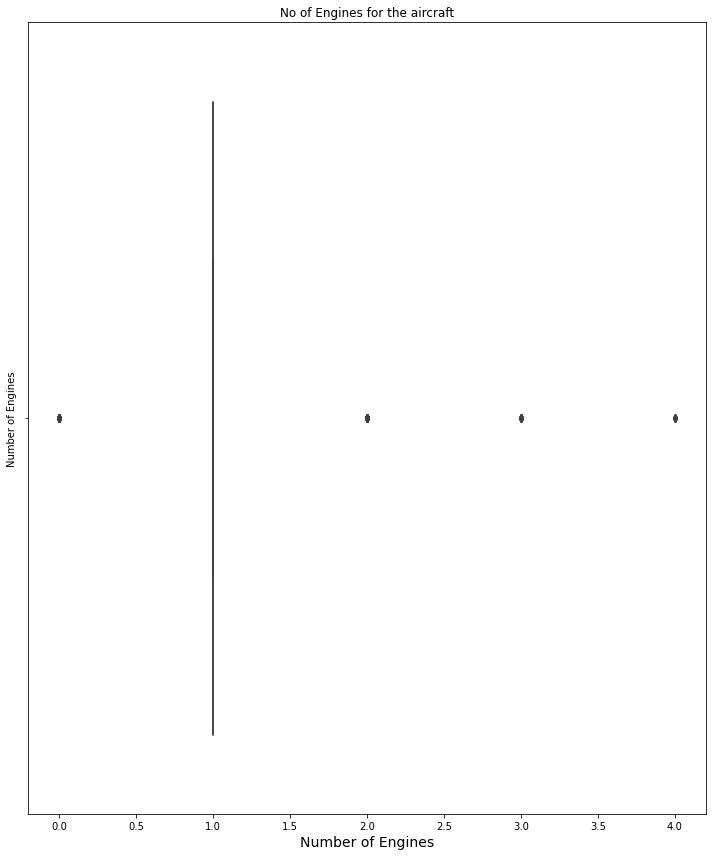

In [26]:
# Identify Outliers in columns with numerical data
# Using boxplot
#Box plot for number_of_engines
fig, ax = plt.subplots(figsize=(10, 12))

sns.boxplot(x='number_of_engines', data=df_cleaned, ax=ax)
ax.set_xlabel('Number of Engines', fontsize=14)
plt.title('No of Engines for the aircraft')
plt.ylabel('Number of Engines')
plt.tight_layout()
plt.show()

# Exploratory Data Analysis

In [27]:
# Describe the cleaned data of #df_cleaned DataFrme
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3630 entries, 20020909X01562 to 20080109X00032
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   investigation_type      3630 non-null   object 
 1   accident_number         3630 non-null   object 
 2   event_date              3630 non-null   object 
 3   location                3630 non-null   object 
 4   country                 3621 non-null   object 
 5   latitude                115 non-null    object 
 6   longitude               115 non-null    object 
 7   airport_code            1732 non-null   object 
 8   airport_name            2213 non-null   object 
 9   injury_severity         3630 non-null   object 
 10  aircraft_damage         3630 non-null   object 
 11  aircraft_category       3630 non-null   object 
 12  registration_number     3630 non-null   object 
 13  make                    3630 non-null   object 
 14  model                 

In [28]:
# Find statistics of the numerical data
df_cleaned.describe()

,number_of_engines,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured
count,3630.000000,3630.000000,3630.000000,3598.000000,3593.000000
mean,1.132782,0.491185,0.223691,0.279878,2.148066
std,0.419292,3.957657,0.800999,1.095796,12.992816
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,4.000000,228.000000,26.000000,33.000000,393.000000


In [29]:
# get the mean of every numerical data
df_cleaned.mean()

<ipython-input-29-bbffe3daea50>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_cleaned.mean()


number_of_engines         1.132782
total_fatal_injuries      0.491185
total_serious_injuries    0.223691
total_minor_injuries      0.279878
total_uninjured           2.148066
dtype: float64

In [30]:
df_cleaned['total_fatal_injuries'].median()

0.0

In [31]:
df_cleaned['total_minor_injuries'].median()

0.0

In [32]:
df_cleaned['total_serious_injuries'].median()

0.0

In [33]:
# what is ths counts for the different models
df_cleaned['model'].value_counts()

152          135
172           98
150           76
PA-28-140     67
172N          66
            ... 
315B           1
65-90          1
280            1
DR-1           1
206L-3         1
Name: model, Length: 1111, dtype: int64

In [34]:
# what is the count for the broad_phase_of_flight
df_cleaned['broad_phase_of_flight'].value_counts()

Landing        931
Takeoff        769
Cruise         624
Maneuvering    442
Approach       399
Taxi           128
Descent         97
Climb           93
Go-around       57
Unknown         51
Standing        26
Other           13
Name: broad_phase_of_flight, dtype: int64

# Aircraft with low or no total_fatal_injuries

In [35]:
df_cleaned['total_fatal_injuries'].value_counts()

0.0      2896
1.0       331
2.0       218
3.0        86
4.0        56
5.0        14
6.0        12
8.0         8
7.0         3
12.0        1
11.0        1
27.0        1
16.0        1
228.0       1
13.0        1
Name: total_fatal_injuries, dtype: int64

In [36]:
# aircraft with the top ten most fatalities 

top_20_fatalities = list((df_cleaned['total_fatal_injuries'].value_counts()).head(20).index)
top_20_fatalities

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 8.0,
 7.0,
 12.0,
 11.0,
 27.0,
 16.0,
 228.0,
 13.0]

## 20 aircraft models with the LEAST number of total_fatal_injuries

In [37]:
#top 10 least fatalities
top_20_total_fatal_injuries = df_cleaned.groupby("model").agg(total_fatal_injuries=('total_fatal_injuries', 'sum') ).reset_index() 

# LEAST FATAL INJURIES: Sort by total fatal injuries in ascending order to get the least fatalities 
top_20_least_fatalities = top_20_total_fatal_injuries.sort_values("total_fatal_injuries", ascending=True).head(20) 
top_20_least_fatalities

,model,total_fatal_injuries
0,(SOLOY CONVERSION),0.0
641,G-164C,0.0
642,G-21A,0.0
644,G-IV,0.0
645,G164A,0.0
646,G164B,0.0
647,G18S,0.0
651,GOLDWING,0.0
652,GYROCOPTER,0.0
653,Glasair III,0.0


# 20 most aircraft models with the least number of total serious injuries

In [38]:
#top 20 least total serious injuries
top_20_total_serious_injuries = df_cleaned.groupby("model").agg(total_serious_injuries=('total_serious_injuries', 'sum') ).reset_index() 

In [39]:
# Least total serious injuries: Sort by total fatal injuries in ascending order to get the least fatalities 
top_20_least_total_serious_injuries = top_20_total_serious_injuries.sort_values('total_serious_injuries', ascending=True).head(20) 
top_20_least_total_serious_injuries

,model,total_serious_injuries
0,(SOLOY CONVERSION),0.0
656,H-19A,0.0
657,H-295,0.0
658,H-369HS,0.0
659,H-395,0.0
660,H35,0.0
661,HAMLIN,0.0
662,HAWK,0.0
663,HH-43F,0.0
664,HM293,0.0


## 20 most aircraft models with the MOST number of total_fatal_injuries

In [40]:
# top 20 most fatalities

top_20_total_fatal_injuries = df_cleaned.groupby("model").agg(total_fatal_injuries=('total_fatal_injuries', 'sum') ).reset_index() 

# Sort by total fatal injuries in descending order to get the most fatalities 
top_20_most_fatalities = top_20_total_fatal_injuries.sort_values("total_fatal_injuries", ascending=False).head(20) 

top_20_most_fatalities


,model,total_fatal_injuries
351,747-300,228.0
72,172N,36.0
825,PA-28-161,34.0
821,PA-28-140,32.0
208,28-4000,27.0
151,206B,23.0
58,172,22.0
1044,T210M,19.0
71,172M,19.0
45,152,18.0


# Data Visualisation 

## Bar Charts

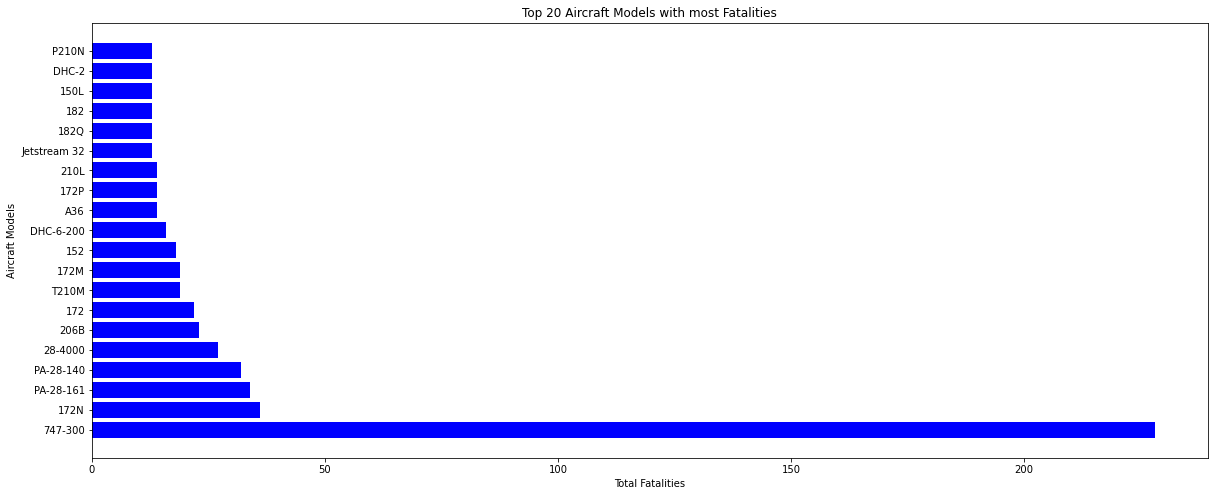

In [41]:

# Plot the top 20 aircraft models with the most fatalities
plt.figure(figsize=(20, 8))
plt.barh(top_20_most_fatalities["model"], top_20_most_fatalities["total_fatal_injuries"], color='blue')
plt.xlabel("Total Fatalities")
plt.ylabel("Aircraft Models")
plt.title("Top 20 Aircraft Models with most Fatalities")
plt.show()

In [42]:
# total_fatal_injuries by make

top_fatal_injuries_make = df_cleaned.groupby('make').agg(total_fatal_injuries = ('total_fatal_injuries', 'sum') ).reset_index() 

top_fatal_injuries_make

,make,total_fatal_injuries
0,Adams,0.0
1,Aero Commander,7.0
2,Aeronca,13.0
3,Aeronca Champ,0.0
4,Aeronca Champion,0.0
...,...,...
308,Weatherly,0.0
309,Wing,2.0
310,"Wootton, John",1.0
311,"Wrb Associates, Llc.",1.0


In [43]:
# Plot the top 20 aircraft makes with the most fatalities
top_20_most_fatalities_make = top_fatal_injuries_make.sort_values("total_fatal_injuries", ascending=False).head(20) 

top_20_most_fatalities_make

,make,total_fatal_injuries
71,Cessna,522.0
217,Piper,315.0
51,Boeing,236.0
33,Beech,140.0
35,Bell,48.0
97,De Havilland,38.0
195,Mooney,34.0
120,Fokker,27.0
42,Bellanca,24.0
236,Robertson,23.0


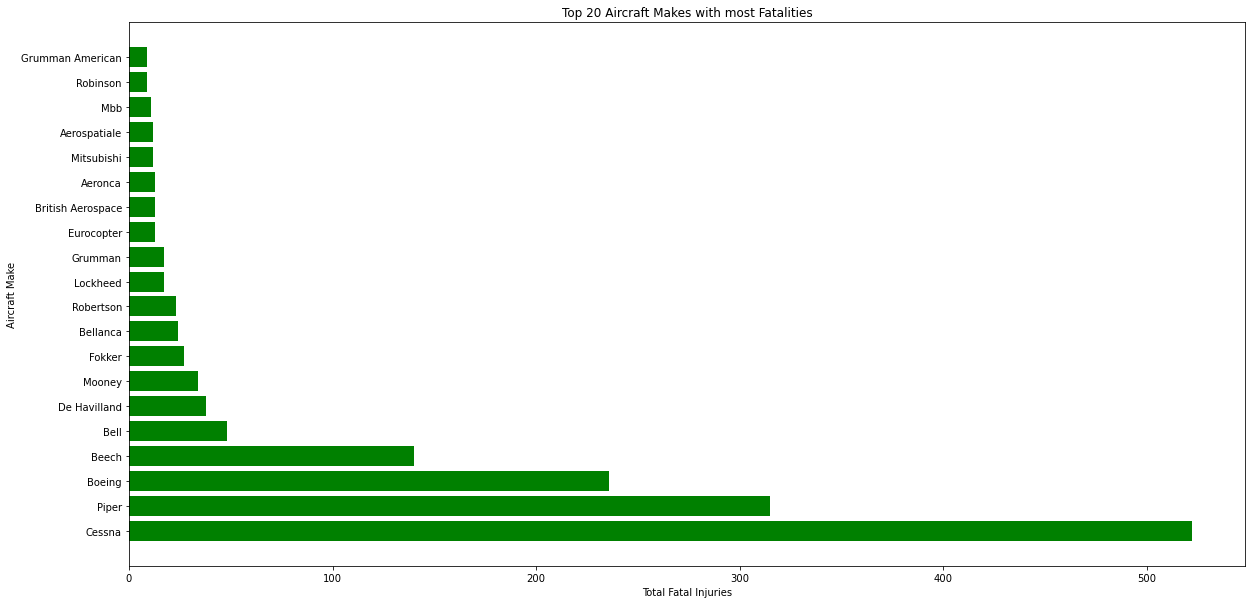

In [44]:
# Plot the top 20 aircraft makes with the most fatalities
plt.figure(figsize=(20, 10))
plt.barh(top_20_most_fatalities_make["make"], top_20_most_fatalities_make["total_fatal_injuries"], color='green')
plt.xlabel("Total Fatal Injuries")
plt.ylabel("Aircraft Make")
plt.title("Top 20 Aircraft Makes with most Fatalities")
plt.show()

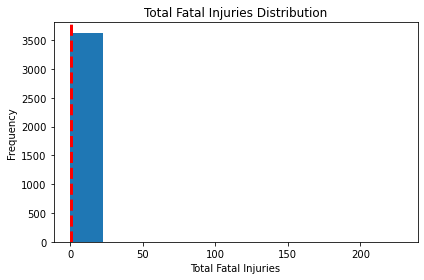

In [45]:
#ploting a histogram of total_fatal_injuries     
df_cleaned['total_fatal_injuries'].plot(kind = 'hist');

plt.xlabel('Total Fatal Injuries')
plt.ylabel('Frequency')
plt.title('Total Fatal Injuries Distribution')
plt.axvline(df_cleaned['total_fatal_injuries'].mean(),color='red',linestyle='dashed',linewidth=3)
plt.tight_layout() 
plt.show()

In [46]:
df_cleaned_tfatal = df_cleaned[df_cleaned['total_fatal_injuries'] < 228] #Keep rows where total_fatal_injuries is less than to 228.
print(df_cleaned_tfatal)

               investigation_type accident_number  event_date  \
Event.Id                                                        
20020909X01562           Accident      SEA82DA022  1982-01-01   
20020909X01561           Accident      NYC82DA015  1982-01-01   
20020917X02148           Accident      FTW82FRJ07  1982-01-02   
20020917X02134           Accident      FTW82FRA14  1982-01-02   
20020917X02119           Accident      FTW82FPJ10  1982-01-02   
...                           ...             ...         ...   
20080108X00030           Accident      CHI08FA055  2007-12-27   
20080102X00006           Accident      SEA08LA054  2007-12-28   
20080103X00010           Accident      DFW08LA052  2007-12-29   
20071231X02014           Accident      DFW08FA053  2007-12-29   
20080109X00032           Accident      NYC08FA071  2007-12-30   

                         location        country   latitude    longitude  \
Event.Id                                                                   
20

In [47]:
df_cleaned_tfatal.head()

,investigation_type,accident_number,event_date,location,country,latitude,longitude,airport_code,airport_name,injury_severity,...,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date
Event.Id,,,,,,,,,,,,,,,,,,,,,
20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,Non-Fatal,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,Non-Fatal,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,NaN,NaN,NaN,NaN,Non-Fatal,...,Personal,NaN,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983
20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,NaN,NaN,T72,HEARNE MUNICIPAL,Fatal(1),...,Personal,NaN,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983
20020917X02119,Accident,FTW82FPJ10,1982-01-02,"CHICKASHA, OK",United States,NaN,NaN,NaN,NaN,Fatal(1),...,Personal,NaN,1.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,02-01-1983


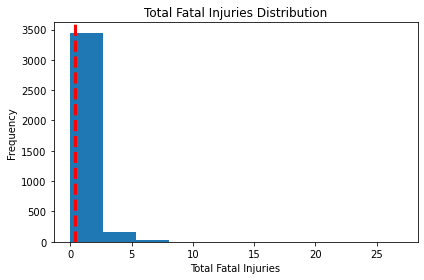

In [48]:

#ploting a histogram of total_fatal_injuries     
df_cleaned_tfatal['total_fatal_injuries'].plot(kind = 'hist');

plt.xlabel('Total Fatal Injuries')
plt.ylabel('Frequency')
plt.title('Total Fatal Injuries Distribution')
plt.axvline(df_cleaned_tfatal['total_fatal_injuries'].mean(),color='red',linestyle='dashed',linewidth=3)
plt.tight_layout() 
plt.show()

### Group data by model and total_fatal_injuries

In [49]:
grouped_data2 = df_cleaned_tfatal.groupby('model')['total_fatal_injuries'].agg(['sum', 'mean'])
grouped_data2

,sum,mean
model,,
(SOLOY CONVERSION),0.0,0.0
0-47B,0.0,0.0
0-77,0.0,0.0
1,0.0,0.0
1-126E,0.0,0.0
...,...,...
WCS-222 (BELL 47G),0.0,0.0
YS-11A,0.0,0.0
Yak 52,2.0,2.0


### Scatter Plots

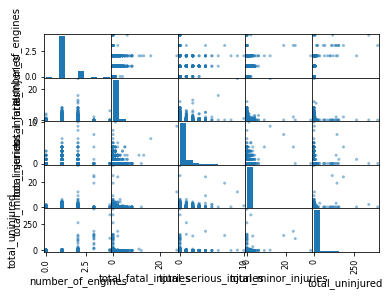

In [50]:

# plottting a scatter matrix to explore what kind of relationships exist in our data
pd.plotting.scatter_matrix(df_cleaned_tfatal);



In [126]:
# scatter plot of model vs total_fatal_injuries

#df_cleaned_tfatal.plot('total_fatal_injuries' kind= 'scatter');


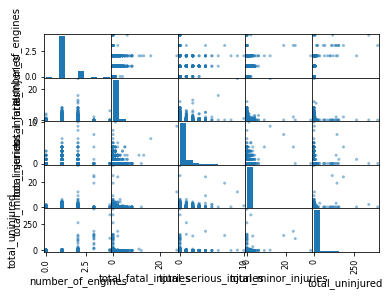

In [51]:
# plottting a scatter matrix to explore what kind of relationships exist in our data
pd.plotting.scatter_matrix(df_cleaned_tfatal);

Text(0, 0.5, 'Total Fatal Injuries')

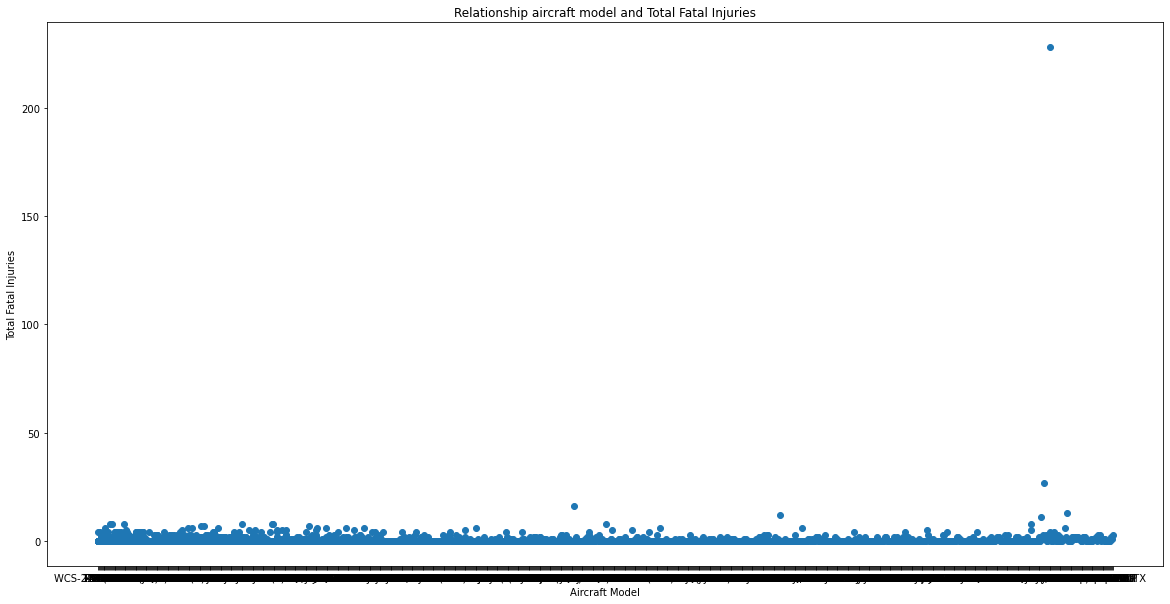

In [52]:
#
scatter_plot_title = 'Relationship aircraft model and Total Fatal Injuries'
model_label = 'Aircraft Model'
total_fatal_injuries_label = 'Total Fatal Injuries'

tackle_figure, ax = plt.subplots(figsize=(20, 10))

# Your code here
ax.scatter(df_cleaned['model'], df_cleaned['total_fatal_injuries'])
# title
ax.set_title(scatter_plot_title)
# x-axis label
ax.set_xlabel(model_label)
# y-axis label
ax.set_ylabel(total_fatal_injuries_label)

Text(0, 0.5, 'Most 20 Total Fatal Injuries')

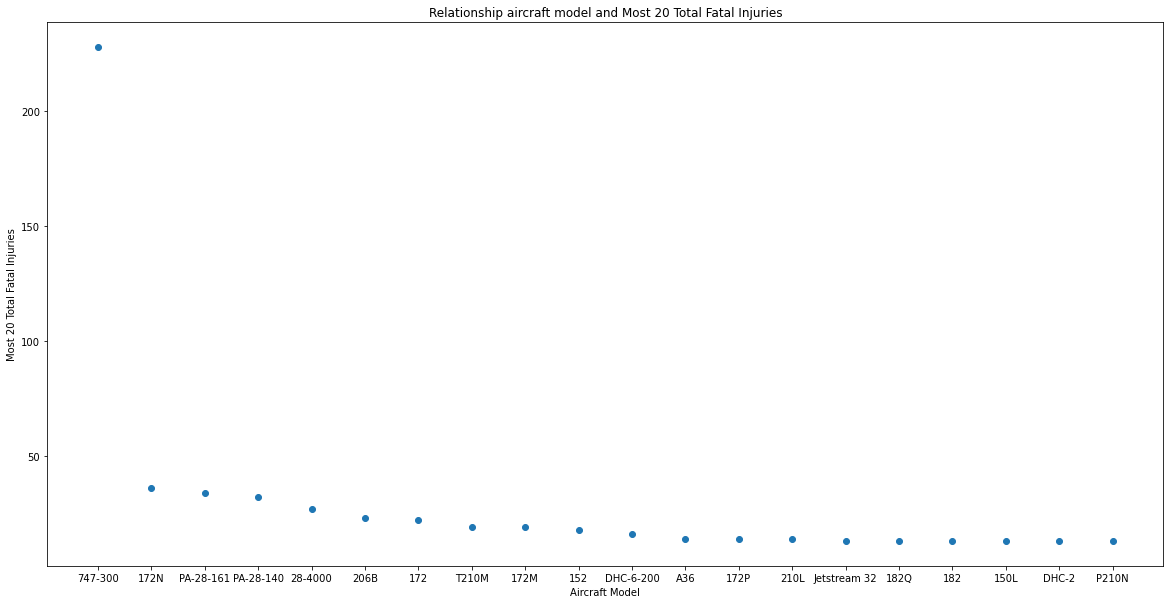

In [53]:
# Your code here - remember to use markdown cells for comments as well!

scatter_plot_title = 'Relationship aircraft model and Most 20 Total Fatal Injuries'
model_label = 'Aircraft Model'
total_fatal_injuries_label = 'Most 20 Total Fatal Injuries'

tackle_figure, ax = plt.subplots(figsize=(20, 10))

# Your code here
ax.scatter(top_20_most_fatalities['model'], top_20_most_fatalities['total_fatal_injuries'])
# title
ax.set_title(scatter_plot_title)
# x-axis label
ax.set_xlabel(model_label)
# y-axis label
ax.set_ylabel(total_fatal_injuries_label)

Text(0, 0.5, 'Total Fatal Injuries')

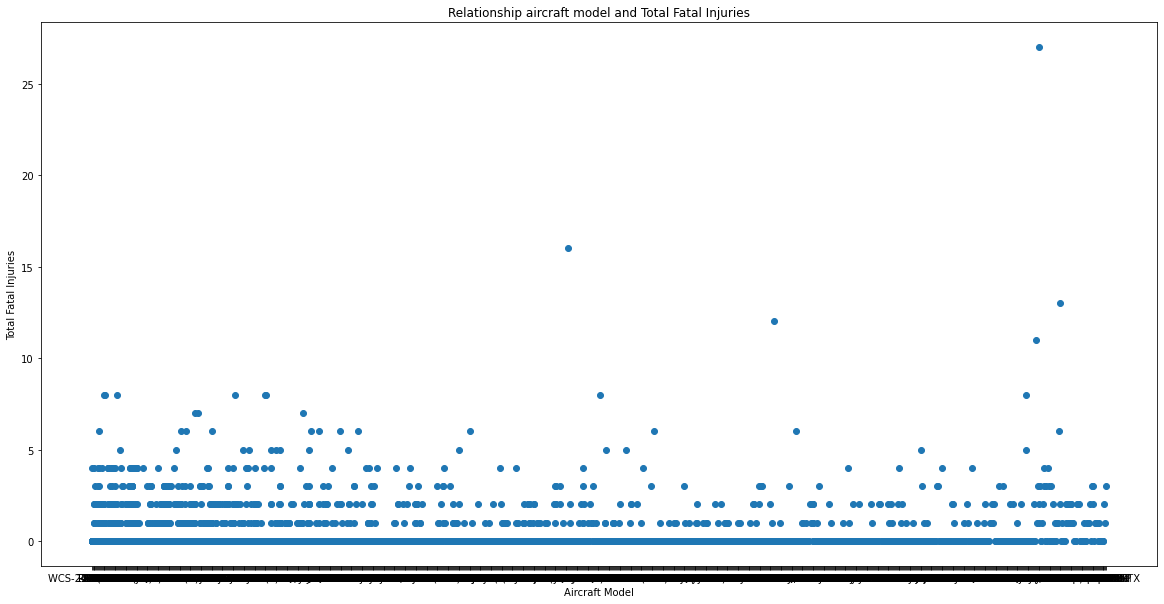

In [54]:
scatter_plot_title = 'Relationship aircraft model and Total Fatal Injuries'
model_label = 'Aircraft Model'
total_fatal_injuries_label = 'Total Fatal Injuries'

tackle_figure, ax = plt.subplots(figsize=(20, 10))

# Your code here
ax.scatter(df_cleaned_tfatal['model'], df_cleaned_tfatal['total_fatal_injuries'])
# title
ax.set_title(scatter_plot_title)
# x-axis label
ax.set_xlabel(model_label)
# y-axis label
ax.set_ylabel(total_fatal_injuries_label)



## Covert the df_cleaned DataFrame to a .csv file

In [55]:
df_cleaned.to_csv('df_cleaned.csv', index=False)

In [56]:
# convert the file to excel
df_cleaned.to_excel("df_cleaned_aviation.xlsx", index=False)

# Reccommendation 



There have been a total of over 90000 accidents and incidents rported by the National Transport Authority over the las 60 years
The mean number of aircraft engines in 1.133
The maximun number of fatalities have been 228
Some aircrafts have not reported any incident or accidents over the years
The aircraft with the most number of fatalities is the model 747-300. This could be due to its high capacity of over 500 passengers

Makes such as Adams, Aeronca Champion and weatherly have not reported any fatal injuries. 
